In [ ]:
# What is Machine Learning:
# In this section we will begin to explore the basic principles of machine learning. Machine Learning is about 
# building programs with tunable parameters (typically an array of floating point values) that are adjusted automatically 
# so as to improve their behavior by adapting to previously seen data.

# Machine Learning can be considered a subfield of Artificial Intelligence since those algorithms can be seen as building 
# blocks to make computers learn to behave more intelligently by somehow generalizing rather that just storing and 
# retrieving data items like a database system would do.

# We'll take a look at two very simple machine learning tasks here. The first is a classification task: 
# the figure shows a collection of two-dimensional data, colored according to two different class labels. 
# A classification algorithm may be used to draw a dividing boundary between the two clusters of points:

# Start matplotlib inline mode, so figures will appear in the notebook
%matplotlib inline

In [ ]:
# Import the example plot from the figures directory
from fig_code import plot_sgd_separator
plot_sgd_separator()

In [ ]:
from fig_code import plot_linear_regression
plot_linear_regression()

In [4]:
import numpy as np

# Generating a random array
X = np.random.random((3, 5))  # a 3 x 5 array

print(X)

[[0.76879058 0.52476943 0.87098373 0.73130224 0.94737243]
 [0.80556704 0.1652445  0.08933118 0.94333031 0.4602678 ]
 [0.75212938 0.28574609 0.60896251 0.46229864 0.72638613]]


In [7]:
# Accessing elements

# get a single element
print (X[0, 0])

# get a row
print (X[1])

# get a column
print (X[:, 1])

0.7687905813962852
[0.80556704 0.1652445  0.08933118 0.94333031 0.4602678 ]
[0.52476943 0.1652445  0.28574609]


In [9]:
# Transposing an array
print (X.T)

[[0.76879058 0.80556704 0.75212938]
 [0.52476943 0.1652445  0.28574609]
 [0.87098373 0.08933118 0.60896251]
 [0.73130224 0.94333031 0.46229864]
 [0.94737243 0.4602678  0.72638613]]


In [11]:
# Turning a row vector into a column vector
y = np.linspace(0, 12, 5)
print(y)

# make into a column vector
print (y[:, np.newaxis])

[ 0.  3.  6.  9. 12.]
[[ 0.]
 [ 3.]
 [ 6.]
 [ 9.]
 [12.]]


In [12]:
# Scipy Sparse Matrices
# We won't make very much use of these in this tutorial, but sparse matrices are very nice in some situations. 
# For example, in some machine learning tasks, especially those associated with textual analysis, the data may be 
# mostly zeros. Storing all these zeros is very inefficient. We can create and manipulate sparse matrices as follows:

# Create a random array with a lot of zeros
X = np.random.random((10, 5))
print (X)

[[1.70735885e-02 2.91789134e-01 6.39644788e-01 4.57829569e-01
  9.88699492e-01]
 [3.76791235e-01 7.26232815e-01 1.77720565e-01 8.99589047e-01
  4.94775019e-01]
 [1.04683483e-01 6.74557097e-01 5.95901465e-01 2.94056925e-01
  1.98300580e-01]
 [7.50656444e-01 8.21043230e-01 8.45645281e-01 9.39417648e-01
  2.82753757e-02]
 [9.41065031e-01 1.49377993e-01 3.81952078e-01 3.51665033e-01
  6.15249956e-01]
 [8.35138117e-01 4.16774666e-01 3.90726505e-02 6.64808121e-01
  6.73568534e-01]
 [2.95223172e-01 9.25876396e-01 4.56219701e-01 4.72046250e-01
  2.27351179e-01]
 [4.46225412e-01 7.30167602e-01 9.42550722e-01 2.59838746e-01
  1.38960094e-03]
 [7.29948795e-01 6.43305557e-02 7.21146270e-01 8.97064625e-01
  3.13282715e-04]
 [1.76377132e-01 2.05627862e-01 4.39560610e-01 8.09197671e-01
  4.45519873e-01]]


In [13]:
X[X < 0.7] = 0
print(X)

[[0.         0.         0.         0.         0.98869949]
 [0.         0.72623282 0.         0.89958905 0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.75065644 0.82104323 0.84564528 0.93941765 0.        ]
 [0.94106503 0.         0.         0.         0.        ]
 [0.83513812 0.         0.         0.         0.        ]
 [0.         0.9258764  0.         0.         0.        ]
 [0.         0.7301676  0.94255072 0.         0.        ]
 [0.7299488  0.         0.72114627 0.89706462 0.        ]
 [0.         0.         0.         0.80919767 0.        ]]


In [15]:
from scipy import sparse

# turn X into a csr (Compressed-Sparse-Row) matrix
X_csr = sparse.csr_matrix(X)
print(X_csr)

  (0, 4)	0.9886994921582801
  (1, 1)	0.726232815326847
  (1, 3)	0.8995890471873416
  (3, 0)	0.7506564436677873
  (3, 1)	0.8210432295301074
  (3, 2)	0.8456452807452898
  (3, 3)	0.9394176483922811
  (4, 0)	0.941065030563558
  (5, 0)	0.8351381168200208
  (6, 1)	0.9258763964710222
  (7, 1)	0.7301676021467527
  (7, 2)	0.942550721882291
  (8, 0)	0.7299487954217403
  (8, 2)	0.7211462698861442
  (8, 3)	0.8970646247222682
  (9, 3)	0.8091976707433026


In [17]:
# convert the sparse matrix to a dense array
print (X_csr.toarray())

[[0.         0.         0.         0.         0.98869949]
 [0.         0.72623282 0.         0.89958905 0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.75065644 0.82104323 0.84564528 0.93941765 0.        ]
 [0.94106503 0.         0.         0.         0.        ]
 [0.83513812 0.         0.         0.         0.        ]
 [0.         0.9258764  0.         0.         0.        ]
 [0.         0.7301676  0.94255072 0.         0.        ]
 [0.7299488  0.         0.72114627 0.89706462 0.        ]
 [0.         0.         0.         0.80919767 0.        ]]


In [19]:
# Sparse matrices support linear algebra:
y = np.random.random(X_csr.shape[1])
z1 = X_csr.dot(y)
z2 = X.dot(y)
np.allclose(z1, z2)

True

In [20]:
# The CSR representation can be very efficient for computations, but it is not as good for adding elements. 
# For that, the LIL (List-In-List) representation is better:

In [22]:
# Create an empty LIL matrix and add some items
X_lil = sparse.lil_matrix((5, 5))

for i, j in np.random.randint(0, 5, (15, 2)):
    X_lil[i, j] = i + j

print (X_lil)
print (X_lil.toarray())

  (0, 2)	2.0
  (0, 3)	3.0
  (1, 1)	2.0
  (1, 4)	5.0
  (2, 0)	2.0
  (2, 2)	4.0
  (3, 0)	3.0
  (3, 1)	4.0
  (3, 2)	5.0
  (3, 3)	6.0
  (4, 1)	5.0
  (4, 3)	7.0
[[0. 0. 2. 3. 0.]
 [0. 2. 0. 0. 5.]
 [2. 0. 4. 0. 0.]
 [3. 4. 5. 6. 0.]
 [0. 5. 0. 7. 0.]]


In [24]:
X_csr = X_lil.tocsr()
print( X_csr)

  (0, 2)	2.0
  (0, 3)	3.0
  (1, 1)	2.0
  (1, 4)	5.0
  (2, 0)	2.0
  (2, 2)	4.0
  (3, 0)	3.0
  (3, 1)	4.0
  (3, 2)	5.0
  (3, 3)	6.0
  (4, 1)	5.0
  (4, 3)	7.0


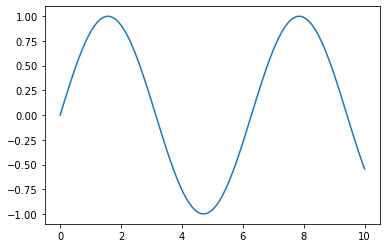

In [26]:
# Matplotlib

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# plotting a line

x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x));

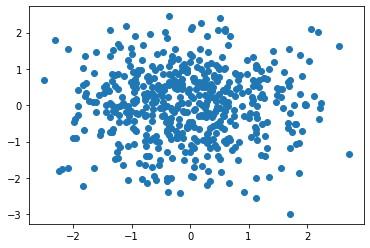

In [27]:
# scatter-plot points

x = np.random.normal(size=500)
y = np.random.normal(size=500)
plt.scatter(x, y);

In [28]:
# showing images
x = np.linspace(1, 12, 100)
y = x[:, np.newaxis]

im = y * np.sin(x) * np.cos(y)
print(im.shape)

(100, 100)


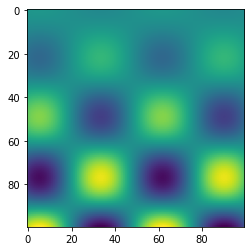

In [29]:
# imshow - note that origin is at the top-left!
plt.imshow(im);

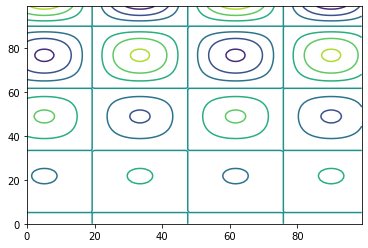

In [30]:
# Contour plot - note that origin here is at the bottom-left!
plt.contour(im);